# Running chronology method on examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import h5py
import tqdm
from chronology import setup, run_mcmc, make_plots

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

First, we test the code on data simulated in the Simulate_data notebook.

Load the simulated data file.

In [2]:
df = pd.read_csv("simulated_data.csv")

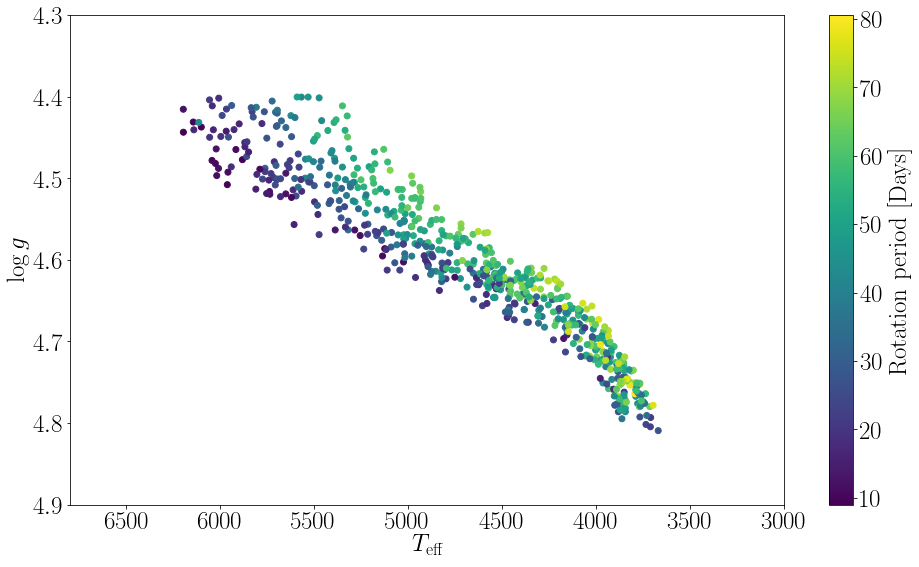

In [3]:
plt.figure(figsize=(16, 9))
plt.scatter(df.teff, df.logg, c=df.prot)
plt.ylim(4.9, 4.3)
plt.xlim(6800, 3000)
plt.xlabel("$T_{\mathrm{eff}}$")
plt.ylabel("$\log g$")
plt.colorbar(label="$\mathrm{Rotation~period~[Days]}$")

In [4]:
teff_err = 50  # Kelvin
logg_err = .1  # dex
feh_err = .01  # dex
jmag_err = .01 # mags
hmag_err = .01  # mags
kmag_err = .01  # mags
parallax_err = .01  # milliarcseconds
prot_err = 1  # Days
BV_err = .01  # mags

Create a dataframe from the observed data.

In [5]:
obs = pd.DataFrame(dict({"teff": df.teff, "teff_err": teff_err,
                         "logg": df.logg, "logg_err": logg_err,
                         "feh": df.feh, "feh_err": feh_err, 
                         "jmag": df.jmag, "jmag_err": jmag_err,
                         "hmag": df.hmag, "hmag_err": hmag_err,
                         "kmag": df.kmag, "kmag_err": kmag_err,
                         "parallax": df.parallax, "parallax_err": parallax_err, 
                         "prot": df.prot, "prot_err": prot_err,
                         "BV": df.BV, "BV_err": BV_err}))

Recover stellar parameters of simulated stars using the full isochronal and gyrochronal model.

In [ ]:
savedir = "simulation_results/iso_and_gyro"
gyro_only, iso_only = False, False

N = len(df)
for i in tqdm.tqdm(range(0, N)):
    print(i, "of", N)
    
    # Set the initial values
    mass_init = 1.
    age_init = 9.
    feh_init = 0.
    distance_init = .5
    Av_init = .01

    # sample in ln(mass), log10(age) and ln(distance).
    p_init = np.array([np.log(mass_init), age_init, feh_init, np.log(distance_init), Av_init])
    
    np.random.seed(42)
    mod, param_dict, args = setup(obs.iloc[i], gyro_only=gyro_only, iso_only=iso_only)
    sampler = run_mcmc(obs.iloc[i], args, p_init, burnin=15000, production=25000)
        
    # Make the plots
    truths = [np.log(df.mass.values[i]), df.age.values[i], df.feh.values[i],
              np.log(df.d_kpc.values[i]), df.Av.values[i]]
    print("truths = ", truths)
    make_plots(sampler, i, truths, savedir)
    
    # Save the samples
    samples = sampler.flatchain
    print("Saving samples...")
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "w") as f:
        data = f.create_dataset("samples", np.shape(samples))
        data[:, :] = samples

Now run the code using just isochrones

In [ ]:
savedir = "simulation_results/iso_only"
gyro_only, iso_only = False, True

N = len(df)
for i in tqdm.tqdm(range(0, N)):
    print(i, "of", N)
    
    # Set the initial values
    mass_init = 1.
    age_init = 9.
    feh_init = 0.
    distance_init = .5
    Av_init = .01

    # sample in ln(mass), log10(age) and ln(distance).
    p_init = np.array([np.log(mass_init), age_init, feh_init, np.log(distance_init), Av_init])
    
    np.random.seed(42)
    mod, param_dict, args = setup(obs.iloc[i], gyro_only=gyro_only, iso_only=iso_only)
    sampler = run_mcmc(obs.iloc[i], args, p_init, burnin=15000, production=50000)
        
    # Make the plots
    truths = [np.log(df.mass.values[i]), df.age.values[i], df.feh.values[i],
              np.log(df.d_kpc.values[i]), df.Av.values[i]]
    print("truths = ", truths)
    make_plots(sampler, i, truths, savedir)
    
    # Save the samples
    samples = sampler.flatchain
    print("Saving samples...")
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "w") as f:
        data = f.create_dataset("samples", np.shape(samples))
        data[:, :] = samples


  0%|          | 0/649 [00:00<?, ?it/s]

0 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))



Production run...
truths =  [-0.4467604118897715, 9.752624233921939, -0.08267824402612095, -2.148468326213699, 0.17821956613160206]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  0%|          | 1/649 [05:54<63:47:20, 354.38s/it]

Saving samples...
1 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.5860550971670604, 9.47761436478077, 0.1594897794024978, -1.0650310434531505, 0.15903600388142913]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  0%|          | 2/649 [11:40<63:15:20, 351.96s/it]

Saving samples...
2 of 649
Burning in...
Production run...
truths =  [-0.4863637971520793, 9.769846506449994, -0.02129672009895261, -0.46517634047232015, 0.5056141198284714]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  0%|          | 3/649 [17:16<62:17:34, 347.14s/it]

Saving samples...
3 of 649
Burning in...
Production run...
truths =  [-0.6482970290786929, 9.132769801618592, 0.18509518195266014, -0.3272855451934451, 0.3792206670156171]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|          | 4/649 [22:42<61:03:34, 340.80s/it]

Saving samples...
4 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.3007500839260305, 9.706508699109156, 0.05323828050539536, -0.07112547500501873, 0.0595858267237227]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|          | 5/649 [27:59<59:41:46, 333.71s/it]

Saving samples...
5 of 649
Burning in...
Production run...
truths =  [-0.6109206497753745, 10.024023873120044, 0.031261541078583484, -0.11459004525392437, 0.7348164395309852]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|          | 6/649 [33:39<59:55:16, 335.49s/it]

Saving samples...
6 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.3619661132084392, 10.057302013700175, 0.09299959828819282, -0.38494131826922046, 0.3369159392561387]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|          | 7/649 [38:57<58:54:35, 330.34s/it]

Saving samples...
7 of 649
Burning in...
Production run...
truths =  [-0.664379962464888, 10.096062839734435, -0.06872738904671896, -0.11465024208673906, 0.0781926037415821]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|          | 8/649 [44:17<58:14:40, 327.11s/it]

Saving samples...
8 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.41935259920306345, 9.336500703211804, -0.054403832148802594, -1.033545421272206, 0.723738540268103]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  1%|▏         | 9/649 [49:53<58:38:55, 329.90s/it]

Saving samples...
9 of 649
Burning in...
Production run...
truths =  [-0.4067630822080706, 9.02669966892684, -0.16221347772145178, -3.533241709618087, 0.4077936403998201]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 10/649 [55:42<59:33:13, 335.51s/it]

Saving samples...
10 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.25226745616962054, 10.111276974618383, -0.01604116341661843, -0.8565130312221187, 0.901201483632856]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 11/649 [1:01:07<58:53:07, 332.27s/it]

Saving samples...
11 of 649
Burning in...
Production run...
truths =  [-0.3742333544513608, 9.916891805998484, 0.1221037049232907, -0.4847667283795025, 0.013276610368066377]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 12/649 [1:06:20<57:46:40, 326.53s/it]

Saving samples...
12 of 649
Burning in...
Production run...
truths =  [-0.0881132341236219, 9.597046702091003, 0.1647861677569986, -0.8825621618394279, 0.7364928270846776]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 13/649 [1:11:43<57:31:39, 325.63s/it]

Saving samples...
13 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.05187693371158192, 9.541841545318949, 0.09539081081490897, -0.03088503603629014, 0.8498993417065163]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 14/649 [1:16:50<56:26:54, 320.02s/it]

Saving samples...
14 of 649
Burning in...
Production run...
truths =  [-0.08453495850397717, 8.935906195931732, 0.054974169846325686, -1.0613920736220128, 0.6576967624990326]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 15/649 [1:22:32<57:31:07, 326.60s/it]

Saving samples...
15 of 649
Burning in...
Production run...
truths =  [-0.3987746410844095, 10.061308936368238, 0.17557781740151013, -1.617209442268505, 0.914832822479442]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  2%|▏         | 16/649 [1:27:59<57:26:15, 326.66s/it]

Saving samples...
16 of 649
Burning in...
Production run...
truths =  [-0.24182992938365946, 9.532150920886467, -0.15696549893207534, -0.11259300727068833, 0.33821589759209625]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  3%|▎         | 17/649 [1:33:11<56:34:43, 322.28s/it]

Saving samples...
17 of 649
Burning in...
Production run...
truths =  [-0.20618649035414413, 10.087065319554505, -0.17618169371171066, -0.558454380385528, 0.8804182005143313]
Plotting age posterior
Plotting production chains...
Making corner plot...


Making linear corner plot...


  3%|▎         | 18/649 [1:38:23<55:57:28, 319.25s/it]

Saving samples...
18 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))


Production run...
truths =  [-0.6197240913137082, 10.13879834413947, -0.1512599656974267, -1.6790762823872685, 0.9103194936928792]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  3%|▎         | 19/649 [1:43:57<56:37:09, 323.54s/it]

Saving samples...
19 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.3747111648693413, 9.984098451817337, 0.14382080702138314, -0.939954047027251, 0.3601845657823891]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  3%|▎         | 20/649 [1:49:36<57:22:00, 328.33s/it]

Saving samples...
20 of 649
Burning in...
Production run...
truths =  [-0.36023907527224847, 9.933840444979397, 0.1946346379909984, -0.0165560374091402, 0.24086474886557274]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  3%|▎         | 21/649 [1:55:03<57:11:15, 327.83s/it]

Saving samples...
21 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.5033632982322142, 9.828587313397668, 0.1143559101401826, -0.819841366857946, 0.6810636967542391]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  3%|▎         | 22/649 [2:00:41<57:38:44, 330.98s/it]

Saving samples...
22 of 649
Burning in...
Production run...
truths =  [-0.1899672575629729, 9.881806610842382, 0.002383649650378905, -2.9697226963454204, 0.2708621848531608]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▎         | 23/649 [2:06:54<59:43:55, 343.51s/it]

Saving samples...
23 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [0.015824673903215007, 9.546754414860024, 0.14112771911639488, -0.9159203122777944, 0.19529862210816384]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▎         | 24/649 [2:12:38<59:40:28, 343.73s/it]

Saving samples...
24 of 649
Burning in...
Production run...
truths =  [0.13009231216391165, 8.791603268655738, 0.006082525627879948, -1.9319742562557933, 0.8864953361029485]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▍         | 25/649 [2:18:35<60:16:16, 347.72s/it]

Saving samples...
25 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))


Production run...
truths =  [-0.3817533722137009, 10.085351819181623, -0.01878946492894587, -2.938101417023797, 0.3952466066624959]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▍         | 26/649 [2:24:28<60:27:44, 349.38s/it]

Saving samples...
26 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))


Production run...
truths =  [-0.27958220876724205, 9.97219232817938, 0.1183582938784946, -2.1486460629433597, 0.296030420007226]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▍         | 27/649 [2:30:35<61:15:18, 354.53s/it]

Saving samples...
27 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.22418672273543358, 10.040234969768338, 0.0944864249527278, -1.2584921944763057, 0.9679500645351484]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▍         | 28/649 [2:36:29<61:06:28, 354.25s/it]

Saving samples...
28 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [0.016103929986537712, 9.396945043975359, -0.1579148772716281, -0.34628248726092925, 0.702522341249909]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  4%|▍         | 29/649 [2:42:07<60:12:35, 349.61s/it]

Saving samples...
29 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.1768053214675371, 9.596405791462027, 0.15740165631914801, -0.6174878303029034, 0.33333303969471795]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▍         | 30/649 [2:47:39<59:10:19, 344.13s/it]

Saving samples...
30 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.19011060845810263, 9.860966947805062, -0.003851800954354945, -0.30070474610220954, 0.3288811963070466]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▍         | 31/649 [2:53:11<58:28:24, 340.62s/it]

Saving samples...
31 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))


Production run...
truths =  [-0.4232993417001439, 9.796004477419515, 0.14506583281621105, -1.6084586157201883, 0.8281709590651297]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▍         | 32/649 [2:59:06<59:06:15, 344.86s/it]

Saving samples...
32 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [0.000736850069933268, 8.937564861319366, 0.07385575235951719, -1.1680666187815092, 0.4812168949071453]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▌         | 33/649 [3:05:23<60:39:55, 354.54s/it]

Saving samples...
33 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.304056214587396, 9.751856745745703, 0.1655163759154758, -0.06277533060091356, 0.7254124024277417]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▌         | 34/649 [3:10:40<58:40:02, 343.42s/it]

Saving samples...
34 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.13635050934278856, 9.978063619137453, 0.17743868654983005, -0.04324091731470562, 0.4217686424136707]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  5%|▌         | 35/649 [3:15:46<56:36:39, 331.92s/it]

Saving samples...
35 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.4622377340235758, 9.80329395741856, 0.006017780197726086, -0.7128056794276469, 0.9837197028143748]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▌         | 36/649 [3:21:07<55:59:55, 328.87s/it]

Saving samples...
36 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.49233702151386877, 9.908486890591996, -0.0071310790506041175, -0.2534542005234622, 0.2737260064443725]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▌         | 37/649 [3:26:25<55:19:03, 325.40s/it]

Saving samples...
37 of 649
Burning in...
Production run...
truths =  [-0.3450393353431432, 9.556050785977165, 0.030928326349142613, -0.9838222472951597, 0.11261255714763607]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▌         | 38/649 [3:31:45<54:57:59, 323.86s/it]

Saving samples...
38 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.262009109289897, 9.887208118048845, -0.051602058412208614, -0.1435332880093876, 0.11967135268442207]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▌         | 39/649 [3:37:01<54:27:29, 321.39s/it]

Saving samples...
39 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))


Production run...
truths =  [-0.2568861949289115, 9.86799111537202, -0.09541982652750967, -0.46166958213556636, 0.4151023658113239]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▌         | 40/649 [3:42:11<53:48:43, 318.10s/it]

Saving samples...
40 of 649
Burning in...
Production run...
truths =  [-0.6380575733944518, 10.135679404482447, 0.026868756767606472, -0.2634782841609715, 0.36769287000988]
Plotting age posterior
Plotting production chains...
Making corner plot...
Making linear corner plot...


  6%|▋         | 41/649 [3:47:50<54:46:11, 324.29s/it]

Saving samples...
41 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2


Production run...
truths =  [-0.27638909725543986, 9.694484175407057, 0.18472481086136286, -1.2640012265962184, 0.1489249792430445]
Plotting age posterior
Plotting production chains...
Making corner plot...


Now with only gyrochronology.

In [8]:
savedir = "simulation_results/gyro_only"
gyro_only, iso_only = True, False

N = len(df)
for i in tqdm.tqdm(range(0, N)):
    print(i, "of", N)
    
    # Set the initial values
    mass_init = 1.
    age_init = 9.
    feh_init = 0.
    distance_init = .5
    Av_init = .01

    # sample in ln(mass), log10(age) and ln(distance).
    p_init = np.array([np.log(mass_init), age_init, feh_init, np.log(distance_init), Av_init])
    
    np.random.seed(42)
    mod, param_dict, args = setup(obs.iloc[i], gyro_only=gyro_only, iso_only=iso_only)
    sampler = run_mcmc(obs.iloc[i], args, p_init, burnin=15000, production=25000)
        
    # Make the plots
    truths = [np.log(df.mass.values[i]), df.age.values[i], df.feh.values[i],
              np.log(df.d_kpc.values[i]), df.Av.values[i]]
    print("truths = ", truths)
    
    print("Plotting age posterior")
    samples = sampler.flatchain
    age_gyr = (10**samples[:, 1])*1e-9
    plt.hist(age_gyr)
    plt.xlabel("Age [Gyr]")
    med, std = np.median(age_gyr), np.std(age_gyr)
    plt.axvline(10**(truths[1])*1e-9, color="tab:orange",
                label="$\mathrm{True~age~[Gyr]}$")
    plt.axvline(med, color="k", label="$\mathrm{Median~age~[Gyr]}$")
    plt.axvline(med - std, color="k", linestyle="--")
    plt.axvline(med + std, color="k", linestyle="--")
    plt.savefig("{0}/{1}_marginal_age".format(savedir, str(i).zfill(4)))
    plt.close()
    
    # Save the samples
    samples = sampler.flatchain
    print("Saving samples...")
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "w") as f:
        data = f.create_dataset("samples", np.shape(samples))
        data[:, :] = samples


  0%|          | 0/649 [00:00<?, ?it/s]/Users/ruthangus/projects/habitablezoning/code/chronology.py:106: RuntimeWarning: overflow encountered in exp
  distance_prior = np.log(priors.distance_prior(np.exp(params[3])))
/Users/ruthangus/projects/habitablezoning/code/priors.py:34: RuntimeWarning: overflow encountered in double_scalars
  return 3/max_distance**3 * distance**2
/Users/ruthangus/projects/habitablezoning/code/chronology.py:104: RuntimeWarning: divide by zero encountered in log
  age_prior = np.log(priors.age_prior(params[1]))


0 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:129: RuntimeWarning: overflow encountered in exp
  params[0] = np.exp(lnparams[0])



Production run...


  0%|          | 1/649 [01:20<14:29:23, 80.50s/it]

truths =  [-0.4467604118897715, 9.752624233921939, -0.08267824402612095, -2.148468326213699, 0.17821956613160206]
Plotting age posterior
Saving samples...
1 of 649
Burning in...
Production run...


  0%|          | 2/649 [02:40<14:25:50, 80.29s/it]

truths =  [-0.5860550971670604, 9.47761436478077, 0.1594897794024978, -1.0650310434531505, 0.15903600388142913]
Plotting age posterior
Saving samples...
2 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:105: RuntimeWarning: divide by zero encountered in log
  feh_prior = np.log(priors.feh_prior(params[2]))


Production run...


  0%|          | 3/649 [04:00<14:23:30, 80.20s/it]

truths =  [-0.4863637971520793, 9.769846506449994, -0.02129672009895261, -0.46517634047232015, 0.5056141198284714]
Plotting age posterior
Saving samples...
3 of 649
Burning in...
Production run...


  1%|          | 4/649 [05:20<14:22:58, 80.28s/it]

truths =  [-0.6482970290786929, 9.132769801618592, 0.18509518195266014, -0.3272855451934451, 0.3792206670156171]
Plotting age posterior
Saving samples...
4 of 649
Burning in...
Production run...


  1%|          | 5/649 [06:40<14:18:49, 80.01s/it]

truths =  [-0.3007500839260305, 9.706508699109156, 0.05323828050539536, -0.07112547500501873, 0.0595858267237227]
Plotting age posterior
Saving samples...
5 of 649
Burning in...
Production run...


  1%|          | 6/649 [08:00<14:17:16, 79.99s/it]

truths =  [-0.6109206497753745, 10.024023873120044, 0.031261541078583484, -0.11459004525392437, 0.7348164395309852]
Plotting age posterior
Saving samples...
6 of 649
Burning in...
Production run...


  1%|          | 7/649 [09:20<14:16:52, 80.08s/it]

truths =  [-0.3619661132084392, 10.057302013700175, 0.09299959828819282, -0.38494131826922046, 0.3369159392561387]
Plotting age posterior
Saving samples...
7 of 649
Burning in...
Production run...


  1%|          | 8/649 [10:40<14:16:05, 80.13s/it]

truths =  [-0.664379962464888, 10.096062839734435, -0.06872738904671896, -0.11465024208673906, 0.0781926037415821]
Plotting age posterior
Saving samples...
8 of 649
Burning in...
Production run...


  1%|▏         | 9/649 [12:00<14:13:25, 80.01s/it]

truths =  [-0.41935259920306345, 9.336500703211804, -0.054403832148802594, -1.033545421272206, 0.723738540268103]
Plotting age posterior
Saving samples...
9 of 649
Burning in...
Production run...


  2%|▏         | 10/649 [13:20<14:10:58, 79.90s/it]

truths =  [-0.4067630822080706, 9.02669966892684, -0.16221347772145178, -3.533241709618087, 0.4077936403998201]
Plotting age posterior
Saving samples...
10 of 649
Burning in...
Production run...


  2%|▏         | 11/649 [14:39<14:09:18, 79.87s/it]

truths =  [-0.25226745616962054, 10.111276974618383, -0.01604116341661843, -0.8565130312221187, 0.901201483632856]
Plotting age posterior
Saving samples...
11 of 649
Burning in...
Production run...


  2%|▏         | 12/649 [16:00<14:09:22, 80.00s/it]

truths =  [-0.3742333544513608, 9.916891805998484, 0.1221037049232907, -0.4847667283795025, 0.013276610368066377]
Plotting age posterior
Saving samples...
12 of 649
Burning in...
Production run...


  2%|▏         | 13/649 [17:19<14:07:03, 79.91s/it]

truths =  [-0.0881132341236219, 9.597046702091003, 0.1647861677569986, -0.8825621618394279, 0.7364928270846776]
Plotting age posterior
Saving samples...
13 of 649
Burning in...
Production run...


  2%|▏         | 14/649 [18:40<14:07:21, 80.07s/it]

truths =  [-0.05187693371158192, 9.541841545318949, 0.09539081081490897, -0.03088503603629014, 0.8498993417065163]
Plotting age posterior
Saving samples...
14 of 649
Burning in...
Production run...


  2%|▏         | 15/649 [19:59<14:03:59, 79.87s/it]

truths =  [-0.08453495850397717, 8.935906195931732, 0.054974169846325686, -1.0613920736220128, 0.6576967624990326]
Plotting age posterior
Saving samples...
15 of 649
Burning in...
Production run...


  2%|▏         | 16/649 [21:19<14:01:52, 79.80s/it]

truths =  [-0.3987746410844095, 10.061308936368238, 0.17557781740151013, -1.617209442268505, 0.914832822479442]
Plotting age posterior
Saving samples...
16 of 649
Burning in...


/Users/ruthangus/anaconda/lib/python3.5/site-packages/isochrones-1.1-py3.5.egg/isochrones/isochrone.py:536: RuntimeWarning: divide by zero encountered in log10
  dm = 5*np.log10(distance) - 5
/Users/ruthangus/projects/habitablezoning/code/chronology.py:130: RuntimeWarning: overflow encountered in exp
  params[3] = np.exp(lnparams[3])


Production run...


  3%|▎         | 17/649 [22:38<14:00:04, 79.75s/it]

truths =  [-0.24182992938365946, 9.532150920886467, -0.15696549893207534, -0.11259300727068833, 0.33821589759209625]
Plotting age posterior
Saving samples...
17 of 649
Burning in...
Production run...


  3%|▎         | 18/649 [23:58<13:57:53, 79.67s/it]

truths =  [-0.20618649035414413, 10.087065319554505, -0.17618169371171066, -0.558454380385528, 0.8804182005143313]
Plotting age posterior
Saving samples...
18 of 649
Burning in...
Production run...


  3%|▎         | 19/649 [25:18<13:56:48, 79.70s/it]

truths =  [-0.6197240913137082, 10.13879834413947, -0.1512599656974267, -1.6790762823872685, 0.9103194936928792]
Plotting age posterior
Saving samples...
19 of 649
Burning in...
Production run...
truths =  [-0.3747111648693413, 9.984098451817337, 0.14382080702138314, -0.939954047027251, 0.3601845657823891]
Plotting age posterior
Saving samples...


  3%|▎         | 20/649 [26:39<13:59:42, 80.10s/it]

20 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:137: RuntimeWarning: invalid value encountered in double_scalars
  bv = B-V


Production run...


  3%|▎         | 21/649 [27:59<13:59:57, 80.25s/it]

truths =  [-0.36023907527224847, 9.933840444979397, 0.1946346379909984, -0.0165560374091402, 0.24086474886557274]
Plotting age posterior
Saving samples...
21 of 649
Burning in...
Production run...


  3%|▎         | 22/649 [29:18<13:54:52, 79.89s/it]

truths =  [-0.5033632982322142, 9.828587313397668, 0.1143559101401826, -0.819841366857946, 0.6810636967542391]
Plotting age posterior
Saving samples...
22 of 649
Burning in...
Production run...


  4%|▎         | 23/649 [30:38<13:52:08, 79.76s/it]

truths =  [-0.1899672575629729, 9.881806610842382, 0.002383649650378905, -2.9697226963454204, 0.2708621848531608]
Plotting age posterior
Saving samples...
23 of 649
Burning in...
Production run...


  4%|▎         | 24/649 [31:57<13:50:03, 79.69s/it]

truths =  [0.015824673903215007, 9.546754414860024, 0.14112771911639488, -0.9159203122777944, 0.19529862210816384]
Plotting age posterior
Saving samples...
24 of 649
Burning in...


/Users/ruthangus/projects/habitablezoning/code/chronology.py:134: RuntimeWarning: overflow encountered in double_scalars
  mag_pars = (params[0], params[1], params[2], params[3]*1e3, params[4])


Production run...


  4%|▍         | 25/649 [33:19<13:54:10, 80.21s/it]

truths =  [0.13009231216391165, 8.791603268655738, 0.006082525627879948, -1.9319742562557933, 0.8864953361029485]
Plotting age posterior
Saving samples...
25 of 649
Burning in...
Production run...


  4%|▍         | 26/649 [34:39<13:53:52, 80.31s/it]

truths =  [-0.3817533722137009, 10.085351819181623, -0.01878946492894587, -2.938101417023797, 0.3952466066624959]
Plotting age posterior
Saving samples...
26 of 649
Burning in...
Production run...


  4%|▍         | 27/649 [35:59<13:52:04, 80.26s/it]

truths =  [-0.27958220876724205, 9.97219232817938, 0.1183582938784946, -2.1486460629433597, 0.296030420007226]
Plotting age posterior
Saving samples...
27 of 649
Burning in...
Production run...


  4%|▍         | 28/649 [37:19<13:49:37, 80.16s/it]

truths =  [-0.22418672273543358, 10.040234969768338, 0.0944864249527278, -1.2584921944763057, 0.9679500645351484]
Plotting age posterior
Saving samples...
28 of 649
Burning in...
Production run...


  4%|▍         | 29/649 [38:39<13:46:47, 80.01s/it]

truths =  [0.016103929986537712, 9.396945043975359, -0.1579148772716281, -0.34628248726092925, 0.702522341249909]
Plotting age posterior
Saving samples...
29 of 649
Burning in...
Production run...


  5%|▍         | 30/649 [39:58<13:43:22, 79.81s/it]

truths =  [-0.1768053214675371, 9.596405791462027, 0.15740165631914801, -0.6174878303029034, 0.33333303969471795]
Plotting age posterior
Saving samples...
30 of 649
Burning in...
Production run...
truths =  [-0.19011060845810263, 9.860966947805062, -0.003851800954354945, -0.30070474610220954, 0.3288811963070466]
Plotting age posterior
Saving samples...


  5%|▍         | 31/649 [41:18<13:42:26, 79.85s/it]

31 of 649
Burning in...
Production run...


  5%|▍         | 32/649 [42:38<13:39:58, 79.74s/it]

truths =  [-0.4232993417001439, 9.796004477419515, 0.14506583281621105, -1.6084586157201883, 0.8281709590651297]
Plotting age posterior
Saving samples...
32 of 649
Burning in...
Production run...


  5%|▌         | 33/649 [43:58<13:39:24, 79.81s/it]

truths =  [0.000736850069933268, 8.937564861319366, 0.07385575235951719, -1.1680666187815092, 0.4812168949071453]
Plotting age posterior
Saving samples...
33 of 649
Burning in...
Production run...


  5%|▌         | 34/649 [45:17<13:36:27, 79.66s/it]

truths =  [-0.304056214587396, 9.751856745745703, 0.1655163759154758, -0.06277533060091356, 0.7254124024277417]
Plotting age posterior
Saving samples...
34 of 649
Burning in...
Production run...


  5%|▌         | 35/649 [46:37<13:36:17, 79.77s/it]

truths =  [-0.13635050934278856, 9.978063619137453, 0.17743868654983005, -0.04324091731470562, 0.4217686424136707]
Plotting age posterior
Saving samples...
35 of 649
Burning in...
Production run...


  6%|▌         | 36/649 [47:57<13:35:04, 79.78s/it]

truths =  [-0.4622377340235758, 9.80329395741856, 0.006017780197726086, -0.7128056794276469, 0.9837197028143748]
Plotting age posterior
Saving samples...
36 of 649
Burning in...
Production run...


  6%|▌         | 37/649 [49:16<13:31:59, 79.61s/it]

truths =  [-0.49233702151386877, 9.908486890591996, -0.0071310790506041175, -0.2534542005234622, 0.2737260064443725]
Plotting age posterior
Saving samples...
37 of 649
Burning in...
Production run...


  6%|▌         | 38/649 [50:36<13:31:29, 79.69s/it]

truths =  [-0.3450393353431432, 9.556050785977165, 0.030928326349142613, -0.9838222472951597, 0.11261255714763607]
Plotting age posterior
Saving samples...
38 of 649
Burning in...
Production run...


  6%|▌         | 39/649 [51:57<13:33:37, 80.03s/it]

truths =  [-0.262009109289897, 9.887208118048845, -0.051602058412208614, -0.1435332880093876, 0.11967135268442207]
Plotting age posterior
Saving samples...
39 of 649
Burning in...
Production run...


  6%|▌         | 40/649 [53:18<13:35:36, 80.36s/it]

truths =  [-0.2568861949289115, 9.86799111537202, -0.09541982652750967, -0.46166958213556636, 0.4151023658113239]
Plotting age posterior
Saving samples...
40 of 649
Burning in...
Production run...


  6%|▋         | 41/649 [54:38<13:32:24, 80.17s/it]

truths =  [-0.6380575733944518, 10.135679404482447, 0.026868756767606472, -0.2634782841609715, 0.36769287000988]
Plotting age posterior
Saving samples...
41 of 649
Burning in...
Production run...


  6%|▋         | 42/649 [55:57<13:28:20, 79.90s/it]

truths =  [-0.27638909725543986, 9.694484175407057, 0.18472481086136286, -1.2640012265962184, 0.1489249792430445]
Plotting age posterior
Saving samples...
42 of 649
Burning in...
Production run...


  7%|▋         | 43/649 [57:16<13:25:00, 79.70s/it]

truths =  [-0.4124752475883623, 9.581410929568603, 0.06093508186990315, -0.07206218113046967, 0.9762218137053236]
Plotting age posterior
Saving samples...
43 of 649
Burning in...
Production run...


  7%|▋         | 44/649 [58:36<13:25:18, 79.87s/it]

truths =  [-0.1084947060689795, 9.728658825716547, 0.08865088995226089, -3.1445653249273264, 0.9615030612093836]
Plotting age posterior
Saving samples...
44 of 649
Burning in...
Production run...


  7%|▋         | 45/649 [59:56<13:22:56, 79.76s/it]

truths =  [-0.19893012915141423, 9.914886937368014, -0.15901107766652067, -3.4268147540296563, 0.6635616823862596]
Plotting age posterior
Saving samples...
45 of 649
Burning in...
Production run...


  7%|▋         | 46/649 [1:01:15<13:20:30, 79.65s/it]

truths =  [-0.13493652568166611, 9.445929387331859, 0.05709260201697764, -1.311852228035632, 0.7772603908341781]
Plotting age posterior
Saving samples...
46 of 649
Burning in...
Production run...


  7%|▋         | 47/649 [1:02:35<13:19:13, 79.66s/it]

truths =  [-0.4425678512771079, 10.104072374880213, 0.07507263813488868, -1.1087370295415917, 0.3075161177777197]
Plotting age posterior
Saving samples...
47 of 649
Burning in...
Production run...


  7%|▋         | 48/649 [1:03:54<13:17:16, 79.59s/it]

truths =  [-0.3530511744176367, 9.833626817117164, -0.13869883232042576, -0.11519143188592675, 0.4737006347407921]
Plotting age posterior
Saving samples...
48 of 649
Burning in...
Production run...


  8%|▊         | 49/649 [1:05:14<13:15:22, 79.54s/it]

truths =  [-0.4431736368348213, 9.89498480598392, 0.11301372573737105, -1.2155999058723346, 0.5279490246591002]
Plotting age posterior
Saving samples...
49 of 649
Burning in...
Production run...


  8%|▊         | 50/649 [1:06:34<13:14:46, 79.61s/it]

truths =  [-0.5000595246425799, 9.629403968553603, 0.05607575394866804, -0.5486929280563796, 0.7430755742473724]
Plotting age posterior
Saving samples...
50 of 649
Burning in...
Production run...


  8%|▊         | 51/649 [1:07:54<13:14:26, 79.71s/it]

truths =  [-0.5743592011613703, 9.618747320267174, -0.00017273273474405215, -2.3733220456154367, 0.462559124698496]
Plotting age posterior
Saving samples...
51 of 649
Burning in...
Production run...


  8%|▊         | 52/649 [1:09:13<13:13:35, 79.76s/it]

truths =  [-0.46102865520404285, 10.104397229678694, -0.03762623065631554, -2.063523015208966, 0.4152746825698225]
Plotting age posterior
Saving samples...
52 of 649
Burning in...
Production run...


  8%|▊         | 53/649 [1:10:33<13:11:35, 79.69s/it]

truths =  [-0.21870138400499703, 9.221840794444825, 0.07304806226586003, -0.6270630060080308, 0.4757972841457106]
Plotting age posterior
Saving samples...
53 of 649
Burning in...
Production run...
truths =  [-0.14977940542968887, 9.874271215453524, 0.006676495474545463, -1.3731052696587847, 0.08768058978828908]
Plotting age posterior
Saving samples...


  8%|▊         | 54/649 [1:11:52<13:09:30, 79.61s/it]

54 of 649
Burning in...
Production run...


  8%|▊         | 55/649 [1:13:11<13:06:13, 79.42s/it]

truths =  [-0.22394652216234426, 10.097803977676977, 0.054528597565812416, -0.6267993250929035, 0.3123910329205901]
Plotting age posterior
Saving samples...
55 of 649
Burning in...
Production run...


  9%|▊         | 56/649 [1:14:31<13:05:40, 79.49s/it]

truths =  [-0.4166909371542309, 9.69333739238579, 0.1139160480902796, -0.21874958264198938, 0.6342647841025597]
Plotting age posterior
Saving samples...
56 of 649
Burning in...
Production run...


  9%|▉         | 57/649 [1:15:51<13:04:33, 79.52s/it]

truths =  [-0.10152177655041962, 9.250491457002804, 0.18532830789841045, -0.9962551913488011, 0.8532767050029146]
Plotting age posterior
Saving samples...
57 of 649
Burning in...
Production run...


  9%|▉         | 58/649 [1:17:11<13:04:45, 79.67s/it]

truths =  [-0.23769503342801346, 10.096704997161966, -0.1412332213346141, -0.0809480084574922, 0.6499202006700443]
Plotting age posterior
Saving samples...
58 of 649
Burning in...
Production run...


  9%|▉         | 59/649 [1:18:31<13:04:32, 79.78s/it]

truths =  [-0.37660349054566217, 9.10566617090028, 0.18459912684744934, -1.2545867792321428, 0.24274185584208585]
Plotting age posterior
Saving samples...
59 of 649
Burning in...
Production run...


  9%|▉         | 60/649 [1:19:50<13:02:11, 79.68s/it]

truths =  [-0.6889784596923321, 9.336069769187002, 0.1609054815242411, -0.9017419480529321, 0.3421318037052916]
Plotting age posterior
Saving samples...
60 of 649
Burning in...
Production run...


  9%|▉         | 61/649 [1:21:10<13:00:58, 79.69s/it]

truths =  [-0.36870222341352316, 9.270170020327503, -0.16168625070210904, -0.036960337376374656, 0.31218447461846954]
Plotting age posterior
Saving samples...
61 of 649
Burning in...
Production run...


 10%|▉         | 62/649 [1:22:31<13:03:22, 80.07s/it]

truths =  [-0.4221704566109203, 10.005340133198787, -0.19869373304175653, -0.3703745789911276, 0.4472715662531788]
Plotting age posterior
Saving samples...
62 of 649
Burning in...
Production run...


 10%|▉         | 63/649 [1:23:51<13:01:17, 80.00s/it]

truths =  [-0.13651656461248177, 9.854301552530481, -0.09169660394146367, -1.190561382815457, 0.8118382066322273]
Plotting age posterior
Saving samples...
63 of 649
Burning in...
Production run...


 10%|▉         | 64/649 [1:25:10<12:58:02, 79.80s/it]

truths =  [0.08250614579004713, 9.442589943467018, 0.1947574331449699, -0.6434488340849586, 0.6946124042560814]
Plotting age posterior
Saving samples...
64 of 649
Burning in...
Production run...


 10%|█         | 65/649 [1:26:30<12:56:27, 79.77s/it]

truths =  [-0.5854688927685561, 9.963118517896195, -0.19786724877237932, -0.2500289699566423, 0.35421232753232235]
Plotting age posterior
Saving samples...
65 of 649
Burning in...
Production run...


 10%|█         | 66/649 [1:27:50<12:56:39, 79.93s/it]

truths =  [-0.4684376468210304, 9.013313303609149, -0.009980865359461829, -0.054051239765293385, 0.029644484392463814]
Plotting age posterior
Saving samples...
66 of 649
Burning in...
Production run...


 10%|█         | 67/649 [1:29:09<12:53:48, 79.77s/it]

truths =  [-0.21603006163982919, 9.780944769888944, 0.1859809062347368, -2.154384126007293, 0.2057625076177113]
Plotting age posterior
Saving samples...
67 of 649
Burning in...
Production run...


 10%|█         | 68/649 [1:30:29<12:53:13, 79.85s/it]

truths =  [-0.5944860227974885, 9.09791452638726, 0.0337458360657914, -0.31171599358261615, 0.1697125712487264]
Plotting age posterior
Saving samples...
68 of 649
Burning in...
Production run...


 11%|█         | 69/649 [1:31:49<12:51:04, 79.77s/it]

truths =  [-0.3838806049659426, 10.125143253420015, 0.1826847516491416, -0.7947449096043503, 0.11065545847375446]
Plotting age posterior
Saving samples...
69 of 649
Burning in...
Production run...


 11%|█         | 70/649 [1:33:10<12:52:20, 80.04s/it]

truths =  [-0.6728164089569644, 9.666998309607317, -0.19271520841095366, -0.15892539554697016, 0.5870117561712671]
Plotting age posterior
Saving samples...
70 of 649
Burning in...
Production run...


 11%|█         | 71/649 [1:34:29<12:47:42, 79.69s/it]

truths =  [-0.6233596645891923, 10.055301502583008, -0.06480214996071171, -0.4872647929853382, 0.5957831817048039]
Plotting age posterior
Saving samples...
71 of 649
Burning in...
Production run...


 11%|█         | 72/649 [1:35:48<12:46:31, 79.71s/it]

truths =  [-0.5200532458901462, 9.561831181286493, 0.07192862946538886, -0.8220156688710425, 0.280584255940698]
Plotting age posterior
Saving samples...
72 of 649
Burning in...
Production run...


 11%|█         | 73/649 [1:37:08<12:44:51, 79.67s/it]

truths =  [-0.22787403506880533, 10.139260780724305, 0.030976763193549, -0.8242101808768805, 0.9992833177092026]
Plotting age posterior
Saving samples...
73 of 649
Burning in...
Production run...


 11%|█▏        | 74/649 [1:38:28<12:43:30, 79.67s/it]

truths =  [-0.3813155240327555, 9.23463511923049, -0.07131123042076748, -0.4580811147744957, 0.9858583151629012]
Plotting age posterior
Saving samples...
74 of 649
Burning in...
Production run...


 12%|█▏        | 75/649 [1:39:48<12:43:20, 79.79s/it]

truths =  [-0.31726399946549283, 9.75791082509401, -0.1590896070677404, -1.6755721042281044, 0.8745100937028139]
Plotting age posterior
Saving samples...
75 of 649
Burning in...
Production run...


 12%|█▏        | 76/649 [1:41:08<12:42:22, 79.83s/it]

truths =  [-0.2033847967095795, 10.13607442580958, 0.1992742913443281, -0.5992582878339381, 0.7471869046936336]
Plotting age posterior
Saving samples...
76 of 649
Burning in...
Production run...


 12%|█▏        | 77/649 [1:42:27<12:41:18, 79.86s/it]

truths =  [0.10925331715420872, 8.743095572854802, -0.05613123753598953, -0.2263476935051964, 0.968018211064886]
Plotting age posterior
Saving samples...
77 of 649
Burning in...
Production run...


 12%|█▏        | 78/649 [1:43:49<12:43:22, 80.21s/it]

truths =  [-0.26950291387570413, 10.091343913955102, -0.1920972495103661, -0.6872526851420213, 0.2279490479876065]
Plotting age posterior
Saving samples...
78 of 649
Burning in...
Production run...


 12%|█▏        | 79/649 [1:45:08<12:41:00, 80.11s/it]

truths =  [-0.09307195464894427, 9.66332830824034, -0.1823839691540073, -1.8772915633692933, 0.6378664762175703]
Plotting age posterior
Saving samples...
79 of 649
Burning in...
Production run...


 12%|█▏        | 80/649 [1:46:28<12:39:39, 80.10s/it]

truths =  [-0.24733876651896108, 9.905469461191279, 0.011295739784753513, -1.6089413069078464, 0.6095565438811218]
Plotting age posterior
Saving samples...
80 of 649
Burning in...
Production run...
truths =  [-0.29894164799569867, 10.031296109517042, 0.1479081272785036, -0.2102181111201708, 0.06603757999976334]
Plotting age posterior
Saving samples...


 12%|█▏        | 81/649 [1:47:48<12:37:32, 80.02s/it]

81 of 649
Burning in...
Production run...


 13%|█▎        | 82/649 [1:49:10<12:41:13, 80.55s/it]

truths =  [-0.5820295317597304, 9.944254236076862, -0.0770796723282198, -0.9597978620380552, 0.8239583745210526]
Plotting age posterior
Saving samples...
82 of 649
Burning in...
Production run...


 13%|█▎        | 83/649 [1:50:31<12:39:54, 80.55s/it]

truths =  [-0.6881473492467776, 9.54134368766034, -0.1928989335375497, -1.8623769101389571, 0.6871883592019346]
Plotting age posterior
Saving samples...
83 of 649
Burning in...
Production run...


 13%|█▎        | 84/649 [1:51:51<12:37:30, 80.44s/it]

truths =  [-0.5302163107066371, 10.1143232117202, 0.15770445327558275, -2.6287771829605737, 0.2371181973732681]
Plotting age posterior
Saving samples...
84 of 649
Burning in...
Production run...


 13%|█▎        | 85/649 [1:53:10<12:31:38, 79.96s/it]

truths =  [-0.3068184933403682, 10.132148439610404, -0.08454009783895282, -1.3096728769250885, 0.33120879922146906]
Plotting age posterior
Saving samples...
85 of 649
Burning in...
Production run...


 13%|█▎        | 86/649 [1:54:29<12:28:34, 79.78s/it]

truths =  [-0.1734565248983782, 8.742949242198721, 0.05663643388938582, -0.11415997062617736, 0.8409390392739186]
Plotting age posterior
Saving samples...
86 of 649
Burning in...
Production run...


 13%|█▎        | 87/649 [1:55:55<12:45:12, 81.69s/it]

truths =  [-0.2862520472645435, 9.999275152288424, -0.14483990662962454, -0.32382114372215387, 0.2656164786229539]
Plotting age posterior
Saving samples...
87 of 649
Burning in...
Production run...


 14%|█▎        | 88/649 [1:57:24<13:03:08, 83.76s/it]

truths =  [-0.2014961167700882, 9.833954249729668, 0.007584293537269721, -0.1162250155923358, 0.14362531825672584]
Plotting age posterior
Saving samples...
88 of 649
Burning in...
Production run...


 14%|█▎        | 89/649 [1:58:47<13:00:52, 83.67s/it]

truths =  [-0.5444056692776175, 9.883065260137556, -0.16831500394320928, -1.260594577193013, 0.7297719137886617]
Plotting age posterior
Saving samples...
89 of 649
Burning in...
Production run...
emcee: Exception while calling your likelihood function:
  params: [-8.81673482e+107  1.00956597e+001 -5.13402824e-002  5.86979038e+000
  4.34156024e-001]
  args: [<isochrones.starmodel.StarModel object at 0x58f0ceb00>, 68.23096440472568, 1.0, 1.2997382665878376, True, False]
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/ruthangus/anaconda/lib/python3.5/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/ruthangus/projects/habitablezoning/code/chronology.py", line 141, in lnprob
    lnpr = lnprior(params)
  File "/Users/ruthangus/projects/habitablezoning/code/chronology.py", line 106, in lnprior
    distance_prior = np.log(priors.distance_prior(np.exp(params[3])))
KeyboardInterrupt


KeyboardInterrupt: 

Now what happens if you just have photometry?

In [ ]:
obs = pd.DataFrame(dict({"teff": None, "teff_err": None,
                         "logg": None, "logg_err": None,
                         "feh": None, "feh_err": None, 
                         "jmag": df.jmag, "jmag_err": jmag_err,
                         "hmag": df.hmag, "hmag_err": hmag_err,
                         "kmag": df.kmag, "kmag_err": kmag_err,
                         "parallax": df.parallax, "parallax_err": parallax_err, 
                         "prot": df.prot, "prot_err": prot_err,
                         "BV": df.BV, "BV_err": BV_err}))

In [ ]:
savedir = "simulation_results/just_photometry"
gyro_only, iso_only = False, False

N = len(df)
for i in tqdm.tqdm(range(0, N)):
    print(i, "of", N)
    
    # Set the initial values
    mass_init = 1.
    age_init = 9.
    feh_init = 0.
    distance_init = .5
    Av_init = .01

    # sample in ln(mass), log10(age) and ln(distance).
    p_init = np.array([np.log(mass_init), age_init, feh_init, np.log(distance_init), Av_init])
    
    np.random.seed(42)
    mod, param_dict, args = setup(obs.iloc[i], gyro_only=gyro_only, iso_only=iso_only)
    sampler = run_mcmc(obs.iloc[i], args, p_init, burnin=15000, production=25000)
        
    # Make the plots
    truths = [np.log(df.mass.values[i]), df.age.values[i], df.feh.values[i],
              np.log(df.d_kpc.values[i]), df.Av.values[i]]
    print("truths = ", truths)
    make_plots(sampler, i, truths, savedir)
    
    # Save the samples
    samples = sampler.flatchain
    print("Saving samples...")
    with h5py.File("{0}/{1}.h5".format(savedir, str(i).zfill(4)), "w") as f:
        data = f.create_dataset("samples", np.shape(samples))
        data[:, :] = samples